In [4]:
pip install imutils

  Using cached imutils-0.5.4.tar.gz (17 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
Using legacy 'setup.py install' for imutils, since package 'wheel' is not installed.
  Running setup.py install for imutils: started
  Running setup.py install for imutils: finished with status 'done'
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 23.3.1
[notice] To update, run: C:\Users\wirac\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [5]:
import cv2
import numpy as np
from PIL import Image,ImageEnhance
from IPython.display import display, clear_output
import imutils

In [6]:
def biggest_contour(contours):
    biggest = np.array([])
    max_area = 0
    for i in contours:
        area = cv2.contourArea(i)
        if area > 5000:
            peri = cv2.arcLength(i, True)
            approx = cv2.approxPolyDP(i, 0.02 * peri, True)
            if area > max_area and len(approx) == 4:
                biggest = approx
                max_area = area
    return biggest

In [7]:
img = cv2.imread('S__12697604.jpg')
dim = (360 , 450)
img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
img_original = img.copy()

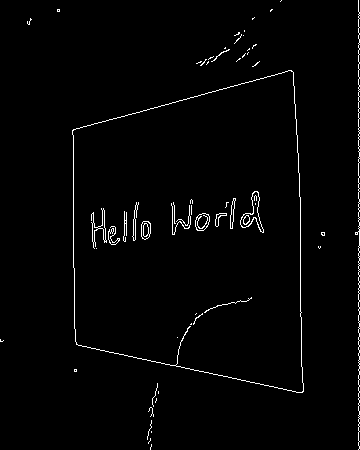

In [8]:
# Image modification
# Image should be have clearly background if not this code will not work
# Cause surface will be detected as a contour next cell can not use findContours() of rectangle
# when run this cell will show image and seen some rectangle for check have a cleary rectangle
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.bilateralFilter(gray, 20, 30, 30)
edged = cv2.Canny(gray, 10, 20)
display(Image.fromarray(edged))

[[291  70]]
[[ 72 130]]
[[ 76 344]]
[[303 391]]


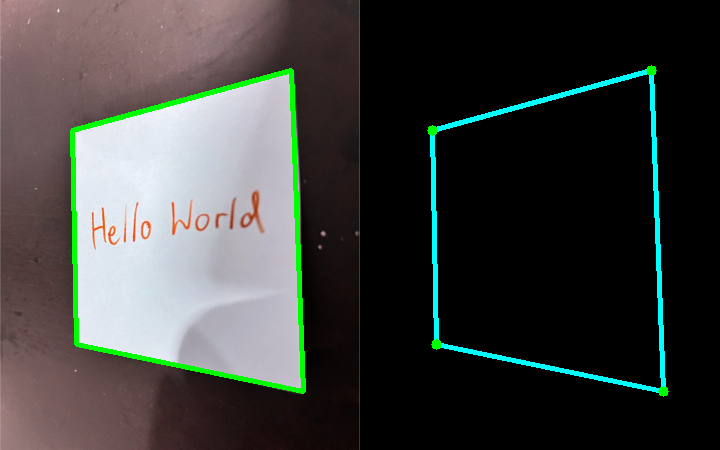

In [9]:
# Contour detection
contours, hierarchy = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
biggest = biggest_contour(contours)
cv2.drawContours(img, [biggest], -1, (0, 255, 0), 3)
con = np.zeros_like(img)
for c in biggest:
    print(c)
    epsilon = 0.02 * cv2.arcLength(c, True)
    corners = cv2.approxPolyDP(c, epsilon, True)
    if len(corners) == 4:
        break
cv2.drawContours(con, [biggest], -1, (0, 255, 255), 3)
cv2.drawContours(con, biggest, -1, (0, 255, 0), 10)
corners = sorted(np.concatenate(corners).tolist())

# Stack the original image and the contour image side by side
stacked = np.hstack((img, con))
display(Image.fromarray(stacked))


In [10]:
points = biggest.reshape(4, 2)
input_points = np.zeros((4, 2), dtype="float32")

points_sum = points.sum(axis=1)
input_points[0] = points[np.argmin(points_sum)]
input_points[3] = points[np.argmax(points_sum)]

points_diff = np.diff(points, axis=1)
input_points[1] = points[np.argmin(points_diff)]
input_points[2] = points[np.argmax(points_diff)]

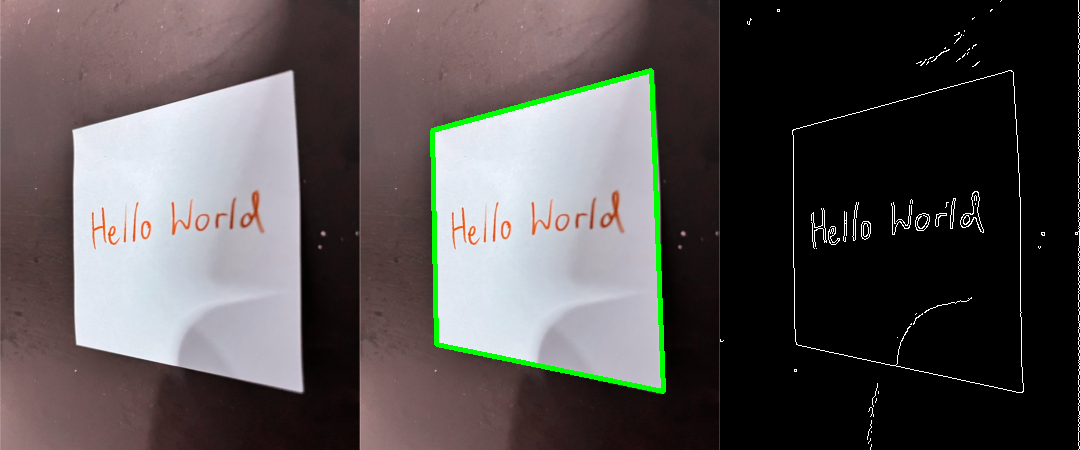

-1

In [11]:
(top_left, top_right, bottom_right, bottom_left) = input_points
bottom_width = np.sqrt(((bottom_right[0] - bottom_left[0]) ** 2) + ((bottom_right[1] - bottom_left[1]) ** 2))
top_width = np.sqrt(((top_right[0] - top_left[0]) ** 2) + ((top_right[1] - top_left[1]) ** 2))
right_height = np.sqrt(((top_right[0] - bottom_right[0]) ** 2) + ((top_right[1] - bottom_right[1]) ** 2))
left_height = np.sqrt(((top_left[0] - bottom_left[0]) ** 2) + ((top_left[1] - bottom_left[1]) ** 2))

max_width = max(int(bottom_width), int(top_width))
# max_height = max(int(right_height), int(left_height))
max_height = int(max_width * 1.414)  

# Desired points values in the output image
converted_points = np.float32([[0, 0], [max_width, 0], [0, max_height], [max_width, max_height]])
matrix = cv2.getPerspectiveTransform(input_points, converted_points)
img_output = cv2.warpPerspective(img_original, matrix, (max_width, max_height))

edged = np.stack((edged,) * 3, axis=-1)

img_hor = np.hstack((img_original, img, edged))
display(Image.fromarray(img_hor))

cv2.waitKey(0)

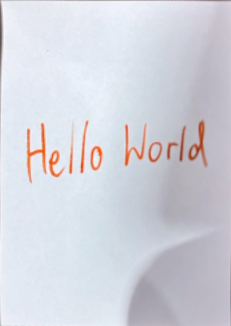

In [12]:
display(Image.fromarray(img_output))